# Prosper Exploratory Analysis
## by Mabelly Tuchsznajder

## Preliminary Wrangling

Prosper is a financial company that matches investors and borrowers in a financially and socially rewarding way.

The goal of this data analysis project is to understand the factors that are related to loans that were charged-off or defaulted. 

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# Ignore warning messages
import warnings
warnings.filterwarnings('ignore')

#### High-level overview of Prosper dataset

In [3]:
loan_df = pd.read_csv('raw/prosperLoanData.csv')
loan_df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [4]:
loan_df.shape

(113937, 81)

In [5]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
ListingKey                             113937 non-null object
ListingNumber                          113937 non-null int64
ListingCreationDate                    113937 non-null object
CreditGrade                            28953 non-null object
Term                                   113937 non-null int64
LoanStatus                             113937 non-null object
ClosedDate                             55089 non-null object
BorrowerAPR                            113912 non-null float64
BorrowerRate                           113937 non-null float64
LenderYield                            113937 non-null float64
EstimatedEffectiveYield                84853 non-null float64
EstimatedLoss                          84853 non-null float64
EstimatedReturn                        84853 non-null float64
ProsperRating (numeric)                84853 non-null float64
ProsperRating (Alpha) 

#### Data Cleaning Process

In [6]:
# Define features of interest for this analysis
features = ['ProsperScore', 'ListingCategory (numeric)', 'EmploymentStatus', 'EmploymentStatusDuration', \
            'IsBorrowerHomeowner', 'CurrentCreditLines', 'OpenRevolvingAccounts', 'DebtToIncomeRatio', \
            'IncomeVerifiable', 'LoanOriginalAmount', 'LoanStatus']

In [7]:
# Look at the dataset
loan_df[features].sample(5)

,ProsperScore,ListingCategory (numeric),EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentCreditLines,OpenRevolvingAccounts,DebtToIncomeRatio,IncomeVerifiable,LoanOriginalAmount,LoanStatus
101193,8.0,1,Employed,3.0,False,8.0,5,0.08,True,2500,Completed
42178,8.0,2,Employed,140.0,True,10.0,5,0.09,True,25000,Current
79971,8.0,2,Employed,60.0,True,10.0,7,0.30,True,5000,Current
112243,4.0,2,Employed,43.0,False,5.0,4,0.14,True,25000,Current
106446,7.0,1,Employed,7.0,True,18.0,6,0.22,True,25000,Current


In [8]:
loan_df[features].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 11 columns):
ProsperScore                 84853 non-null float64
ListingCategory (numeric)    113937 non-null int64
EmploymentStatus             111682 non-null object
EmploymentStatusDuration     106312 non-null float64
IsBorrowerHomeowner          113937 non-null bool
CurrentCreditLines           106333 non-null float64
OpenRevolvingAccounts        113937 non-null int64
DebtToIncomeRatio            105383 non-null float64
IncomeVerifiable             113937 non-null bool
LoanOriginalAmount           113937 non-null int64
LoanStatus                   113937 non-null object
dtypes: bool(2), float64(4), int64(3), object(2)
memory usage: 8.0+ MB


In [9]:
# Check unique LoanStatus
loan_df['LoanStatus'].unique()

array(['Completed', 'Current', 'Past Due (1-15 days)', 'Defaulted',
       'Chargedoff', 'Past Due (16-30 days)', 'Cancelled',
       'Past Due (61-90 days)', 'Past Due (31-60 days)',
       'Past Due (91-120 days)', 'FinalPaymentInProgress',
       'Past Due (>120 days)'], dtype=object)

In [10]:
# Check unique Employment Status
loan_df['EmploymentStatus'].unique()

array(['Self-employed', 'Employed', 'Not available', 'Full-time', 'Other',
       nan, 'Not employed', 'Part-time', 'Retired'], dtype=object)

In [11]:
# Fill nan values with 'Not available'
loan_df['EmploymentStatus'].fillna(value='Not available', inplace=True)

In [12]:
# Define EmploymentStatus as a category
employment_status_dict = ['Not available', 'Other', 'Not employed', 'Self-employed', 
                                               'Part-time', 'Full-time', 'Employed', 'Retired']

ordered_employment_status = pd.api.types.CategoricalDtype(ordered = True, categories = employment_status_dict)
loan_df['EmploymentStatus'] = loan_df['EmploymentStatus'].astype(ordered_employment_status)

In [13]:
# Decode ListingCategory (numeric) feature
list_dict = {0 : 'Not Available', 1 : 'Debt Consolidation', 2 : 'Home Improvement', 3: 'Business', 
             4 : 'Personal Loan', 5 : 'Student Use', 6 : 'Auto', 7 : 'Other', 8 : 'Baby&Adoption', 
             9 : 'Boat', 10 : 'Cosmetic Procedure', 11 : 'Engagement Ring', 12 : 'Green Loans',
             13 : 'Household Expenses', 14 : 'Large Purchases', 15 : 'Medical/Dental', 16 : 'Motorcycle',
             17 : 'RV', 18 : 'Taxes', 19 : 'Vacation', 20 : 'Wedding Loans'}

loan_df['ListingCategory'] = loan_df['ListingCategory (numeric)'].map(list_dict)

In [14]:
# Look at the new ListingCategory feature
loan_df[['ListingCategory (numeric)', 'ListingCategory']].sample(10)

,ListingCategory (numeric),ListingCategory
107918,1,Debt Consolidation
94862,1,Debt Consolidation
65936,1,Debt Consolidation
87794,2,Home Improvement
20372,0,Not Available
64099,0,Not Available
111923,1,Debt Consolidation
104184,1,Debt Consolidation
73988,0,Not Available
99272,0,Not Available


### What is the structure of your dataset?

There are 113,937 loans in the dataset with 81 features. This analysis will focus on factors that are related to Prosper loans status (`LoanStatus`).

The independent variables of interest are:
- `ProsperScore`
- `ListingCategory`
- `EmploymentStatus`
- `EmploymentStatusDuration`
- `IsBorrowerHomeowner`
- `CurrentCreditLines`
- `OpenRevolvingAccounts`
- `DebtToIncomeRatio`
- `IncomeVerifiable`
- `LoanOriginalAmount`


### What is/are the main feature(s) of interest in your dataset?

This analysis will focus on figuring out what features are best for predicting Prosper's loan statuses.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?


The present analysis will investigate a group of borrowers features along with the type of the listing/loan will be analyzed to correctly understand which factors likely impact Prosper's final loan status. 

The features listed in the previous section will be subject of this analysis. However, we do understand that it isn't exhaustive and additional features may be required, as well as a deeper business understanding and history of decisions made by Prosper top management.

## Univariate Exploration

I'll start by looking at the distribution of the main variable of interest: `LoanStatus`. Let's plot this variable to have an idea of its distribution.

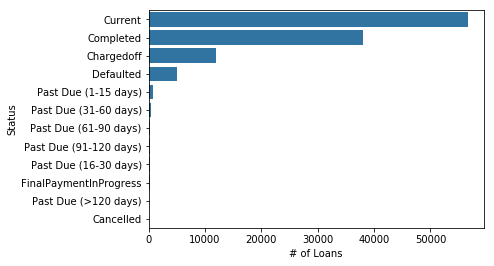

In [15]:
# Plot LoanStatus
default_color = sb.color_palette()[0]

# Order the categorical variable type
cat_order = loan_df['LoanStatus'].value_counts().index

sb.countplot(data = loan_df, y = 'LoanStatus', color = default_color, order=cat_order)
plt.xlabel('# of Loans')
plt.ylabel('Status');

In [16]:
# Check the percentage of loans in each status
pct_loans_by_status = pd.DataFrame(loan_df.groupby('LoanStatus')['LoanStatus'].count())
pct_loans_by_status['PctLoans'] = (pct_loans_by_status['LoanStatus']/pct_loans_by_status['LoanStatus'].sum())*100
pct_loans_by_status.sort_values(by='PctLoans', ascending=False)

,LoanStatus,PctLoans
LoanStatus,,
Current,56576,49.655511
Completed,38074,33.416713
Chargedoff,11992,10.525115
Defaulted,5018,4.404188
Past Due (1-15 days),806,0.707408
Past Due (31-60 days),363,0.318597
Past Due (61-90 days),313,0.274713
Past Due (91-120 days),304,0.266814
Past Due (16-30 days),265,0.232585


In [17]:
# Group all Past Due loans under an unique status
loan_df['LoanStatus'] = loan_df['LoanStatus'].apply(lambda x: x if 'Past Due' not in x else 'Past Due')

# Convert LoanStatus to a categorical variable
loan_status_dict = ['Defaulted','Chargedoff', 'Past Due', 'Current', 'FinalPaymentInProgress', 'Completed']

ordered_loan_status = pd.api.types.CategoricalDtype(ordered = True, categories = loan_status_dict)

loan_df['LoanStatus'] = loan_df['LoanStatus'].astype(ordered_loan_status)

In [18]:
# Check the percentage of loans in each status
pct_loans_by_status = pd.DataFrame(loan_df.groupby('LoanStatus')['LoanStatus'].count())
pct_loans_by_status['PctLoans'] = (pct_loans_by_status['LoanStatus']/pct_loans_by_status['LoanStatus'].sum())*100
pct_loans_by_status.sort_values(by='PctLoans', ascending=False)

,LoanStatus,PctLoans
LoanStatus,,
Current,56576,49.657691
Completed,38074,33.418179
Chargedoff,11992,10.525577
Defaulted,5018,4.404382
Past Due,2067,1.814240
FinalPaymentInProgress,205,0.179932


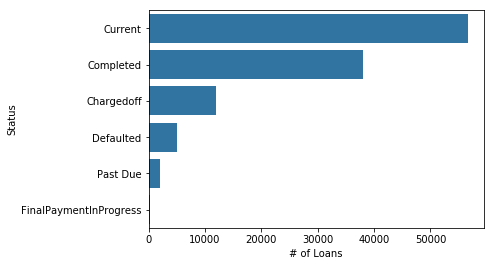

In [19]:
# Plot LoanStatus
default_color = sb.color_palette()[0]

# Order the categorical variable type
cat_order = loan_df['LoanStatus'].value_counts().index

sb.countplot(data = loan_df, y = 'LoanStatus', color = default_color, order=cat_order)
plt.xlabel('# of Loans')
plt.ylabel('Status');

More than 80% of all Prosper loans are either current or completed. Among them, almost 50% are active and being paid by Prosper's borrowers. However, about 15% of Prosper's loans were charged-off or defaulted. 

Additionally, the remaining 1.81% of loans has the status Past Due and was grouped under a single status: *Past Due*.

During this analysis, we'll try to undercover which of the features listed above may contribute to 15% of charged-off and defaulted loans. 

Let's first analyze the distribution of Prosper's borrowers risk.

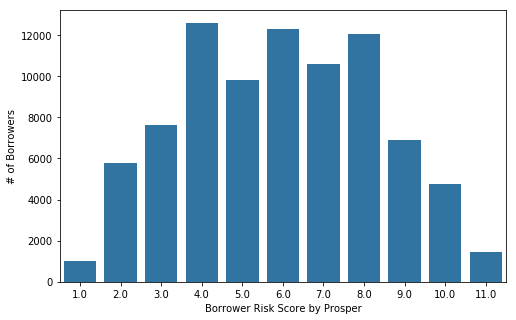

In [20]:
# Plot a standard-scaled plot for ProsperScore
binsize = 1
bins = np.arange(0, loan_df['ProsperScore'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
sb.countplot(data = loan_df, x = 'ProsperScore', color = default_color)
plt.xlabel('Borrower Risk Score by Prosper')
plt.ylabel('# of Borrowers');

Analyzing the distribution of all Prosper's borrowers risk, we noticed that most of the borrowers' risk scores are between 2 and 10 points. 

Let's continue our analysis and take a look at the debt to income ratio of all borrowers.

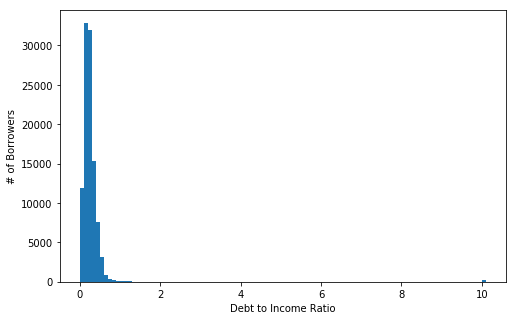

In [21]:
# Plot a standard-scaled plot for DebtToIncomeRatio
binsize = 0.1
bins = np.arange(0, loan_df['DebtToIncomeRatio'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = loan_df, x = 'DebtToIncomeRatio', bins = bins)
plt.xlabel('Debt to Income Ratio')
plt.ylabel('# of Borrowers');

The distribution above shows that most of Prosper's borrowers have a debt to income ratio between zero and 1.5. It's worth to zoom in this range to better analyze this feature.

It's also important to keep in mind that those borrowers with higher debt to income ratio should be analyzed since them can highlight what features can lead to a charged-off or defaulted loan.



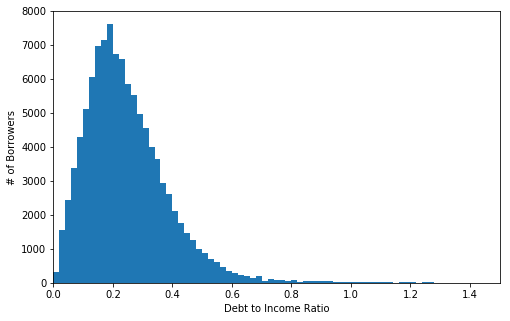

In [22]:
# Plot a standard-scaled plot for DebtToIncomeRatio
binsize = 0.02
bins = np.arange(0, loan_df['DebtToIncomeRatio'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = loan_df[loan_df['DebtToIncomeRatio'].notnull()], x = 'DebtToIncomeRatio', bins = bins)
plt.xlabel('Debt to Income Ratio')
plt.ylabel('# of Borrowers')
plt.xlim(0,1.5);

The zoomed distribution shows that few borrowers have a debt to income ratio more than 1. And its majority follow between 0 and 0.4. 

Another interesting question is regarding the original loan amount. Let's analyze this feature distribution.

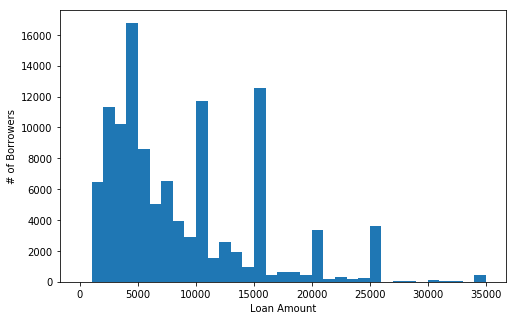

In [23]:
# Plot a standard-scaled plot for DebtToIncomeRatio
binsize = 1000
bins = np.arange(0, loan_df['LoanOriginalAmount'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = loan_df, x = 'LoanOriginalAmount', bins = bins)
plt.xlabel('Loan Amount')
plt.ylabel('# of Borrowers');

Moving on to analyze the distribution of open revolving accounts and current credit lines.

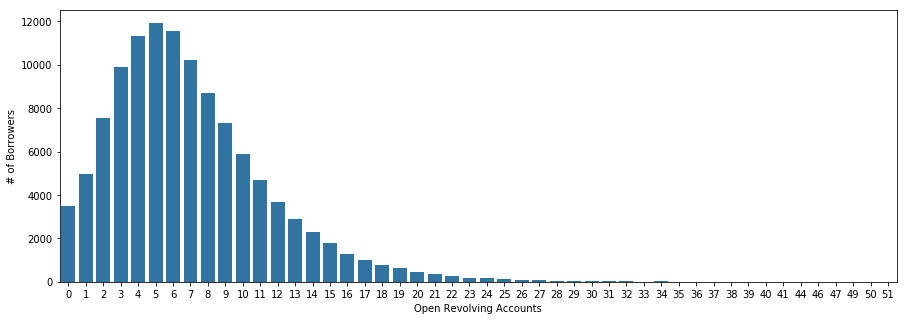

In [24]:
# Plot a standard-scaled plot for OpenRevolvingAccounts
plt.figure(figsize=[15, 5])

sb.countplot(data = loan_df, x = 'OpenRevolvingAccounts', color = default_color)
plt.xlabel('Open Revolving Accounts')
plt.ylabel('# of Borrowers');

Here we also can see that most borrowers have up to 15 revolving accounts. The remaining borrowers have an unsual number of revolving accounts, which should be analyzed to better undertand how it is related with loan statuses.

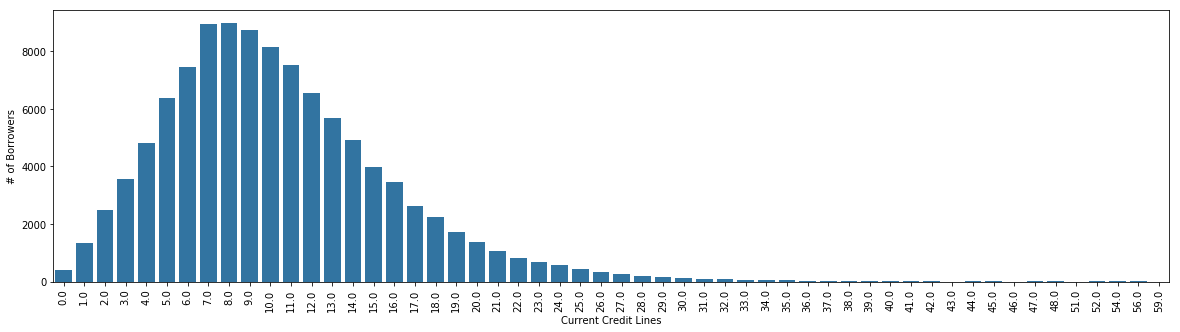

In [25]:
# Plot a standard-scaled plot for CurrentCreditLines
plt.subplots(figsize = [20,5])

sb.countplot(data = loan_df, x = 'CurrentCreditLines', color = default_color)
plt.xlabel('Current Credit Lines')
plt.ylabel('# of Borrowers')
plt.xticks(rotation=90);

Most of Prosper's borrowers have at least two current lines of credit. It would be interting to compare if loans statuses with number of current lines of credit.

Let's take a look at the distribution of listing categories. In other words, which type of loan has more borrowers:

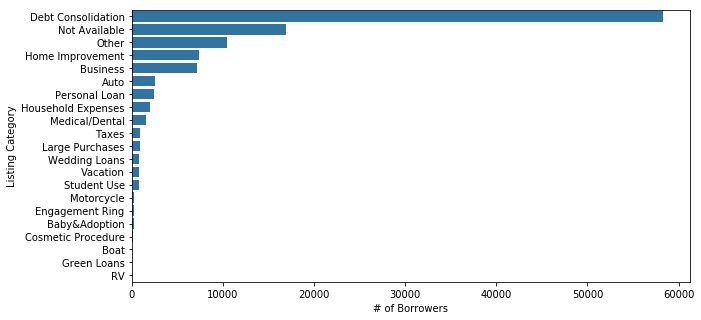

In [26]:
# Plot a standard-scaled plot for ListingCategory
plt.figure(figsize=[10, 5])

# Order the categorical variable type
cat_order = loan_df['ListingCategory'].value_counts().index

sb.countplot(data = loan_df, y = 'ListingCategory', color = default_color, order=cat_order)
plt.ylabel('Listing Category')
plt.xlabel('# of Borrowers');

No doubt that debt consolidation is the most popular type of listing/loan at Prosper. What we may want to know is if there is a particular listing which high number of charged-off or defaulted loans.

We'll now look at the remaining features selected for this analysis to see if any of them hold interesting properties.

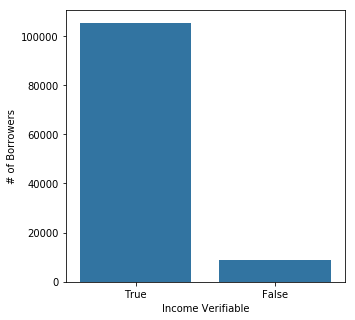

In [27]:
# Plot for IncomeVerifiable
plt.figure(figsize=[5, 5])

# Order the categorical variable type
cat_order = loan_df['IncomeVerifiable'].value_counts().index

sb.countplot(data = loan_df, x = 'IncomeVerifiable', color = default_color, order=cat_order)
plt.xlabel('Income Verifiable')
plt.ylabel('# of Borrowers');

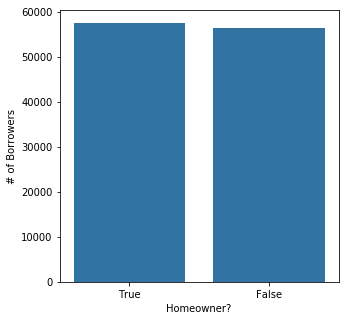

In [28]:
# Plot for IsBorrowerHomeowner
plt.figure(figsize=[5, 5])

# Order the categorical variable type
cat_order = loan_df['IsBorrowerHomeowner'].value_counts().index

sb.countplot(data = loan_df, x = 'IsBorrowerHomeowner', color = default_color, order=cat_order)
plt.xlabel('Homeowner?')
plt.ylabel('# of Borrowers');

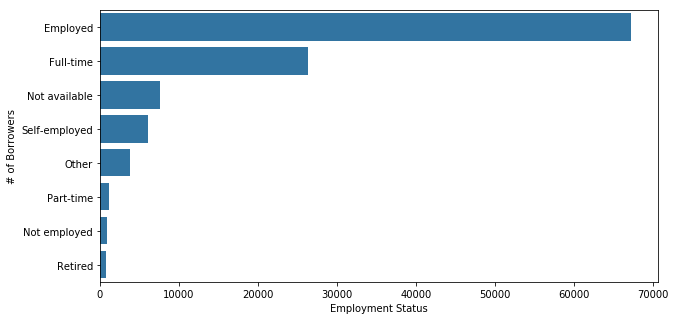

In [29]:
# Plot for EmploymentStatus
plt.figure(figsize=[10, 5])

# Order the categorical variable type
cat_order = loan_df['EmploymentStatus'].value_counts().index

sb.countplot(data = loan_df, y = 'EmploymentStatus', color = default_color, order=cat_order)
plt.xlabel('Employment Status')
plt.ylabel('# of Borrowers');

It's interesting to noticed the majoroty of borrowers do not have any recommendation. Hence, this feature won't tell much about loan statuses.

The only feature not analyzed in this section was `EmploymentStatusDuration` because it only makes sense during the bivariante exploration convered in the next section of this notebook.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

The univariate exploratory analysis showed that most of the Prosper's borrowers have debt consolidation loans. Additionally, the amount lent by Proper to each customer is quite low which can be explained by the type of loans granted by the company.

Although, the current dataset presents several outliers; it was decided to keep them throughout the analysis since it may provide interesting business insights.

Besides, the average debt to income ratio is about 20% which indicates that Prosper does a good job of reducing their risk. 

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

Two features got my attention during the univariate analyses: *Listing Category* and *Loan Status*.

The loan or listing category indicates that most of Prosper loans are debt consolidation. And, its followed by not available and other kinds of loans, indicating that Prosper should do a better job to correctly classify its loans.

Regarding loan status, we can observe that there are different past due categories with very few loans, about 1.81%. So, I decided to consolidate all under a single category called Past Due.

## Bivariate Exploration

To start off with, we will look at the pairwise correlations present between features in the data. 

In [30]:
# Numberical vs Categorical features
numeric_vars = ['ProsperScore', 'EmploymentStatusDuration', 'CurrentCreditLines', 'OpenRevolvingAccounts',
               'DebtToIncomeRatio', 'LoanOriginalAmount']
categoric_vars = ['LoanStatus', 'ListingCategory','EmploymentStatus', 'IsBorrowerHomeowner', 'IncomeVerifiable']

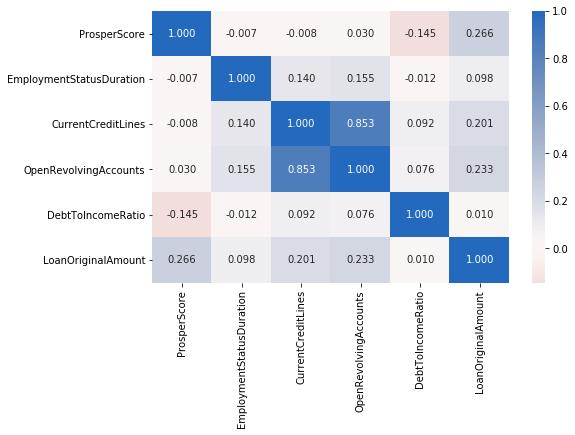

In [31]:
# Correlation plot
plt.figure(figsize = [8, 5])
sb.heatmap(loan_df[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.show()

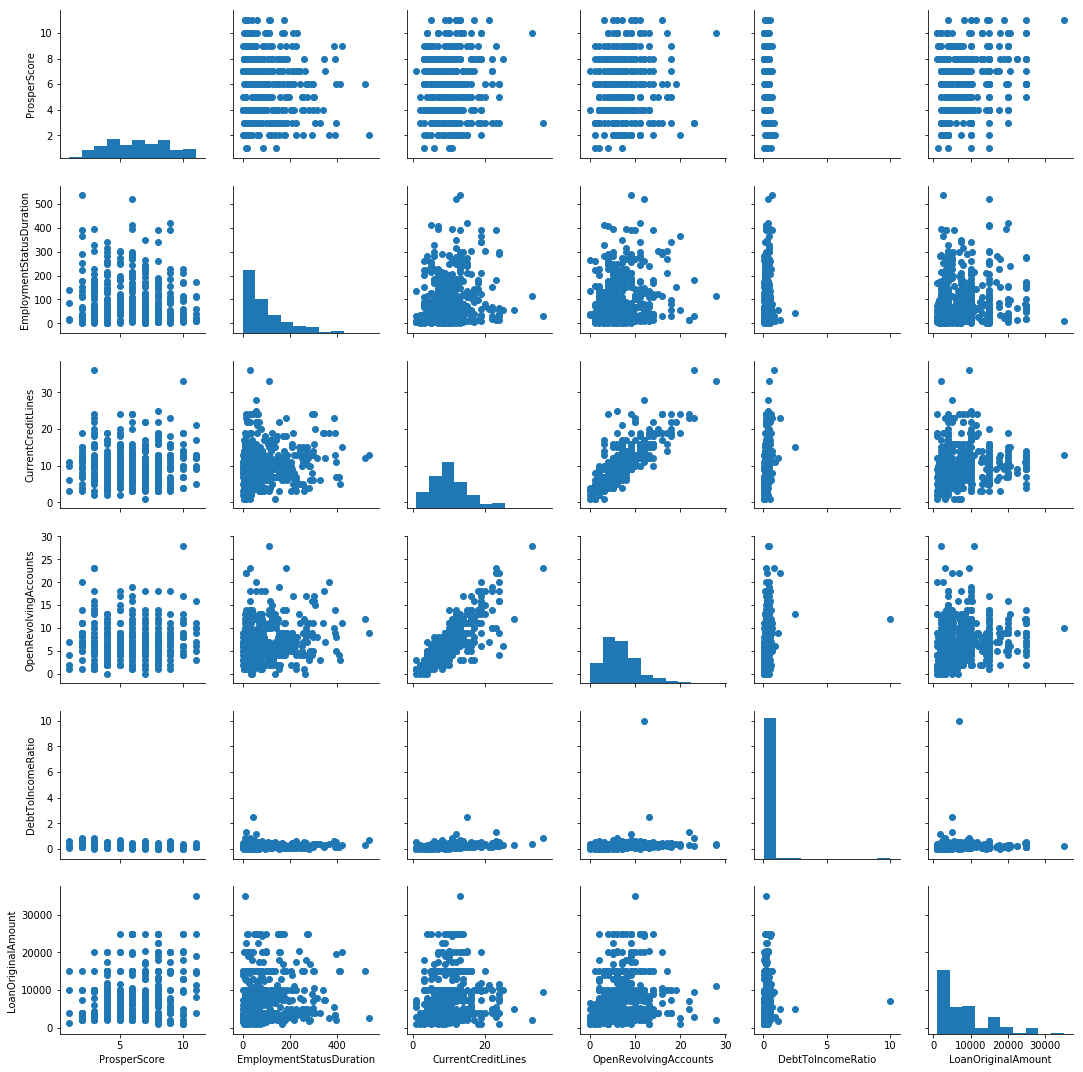

In [32]:
# Plot matrix: sample 500 loans so that plots are clearer and they render faster
samples = np.random.choice(loan_df.shape[0], 500, replace = False)
loan_samples = loan_df.loc[samples,features]

g = sb.PairGrid(data = loan_samples, vars = numeric_vars)
g = g.map_diag(plt.hist)
g.map_offdiag(plt.scatter);

As expected, the `CurrentCreditLines` and `OpenRevolvingAccounts` dimensions are all highly correlated with one another. On the other hand, most of others variables doesn't present a strioplnm

Let's move on to looking at how these two variables correlate with the categorical variables `LoanStatus`, the main feature of interest in this analysis.

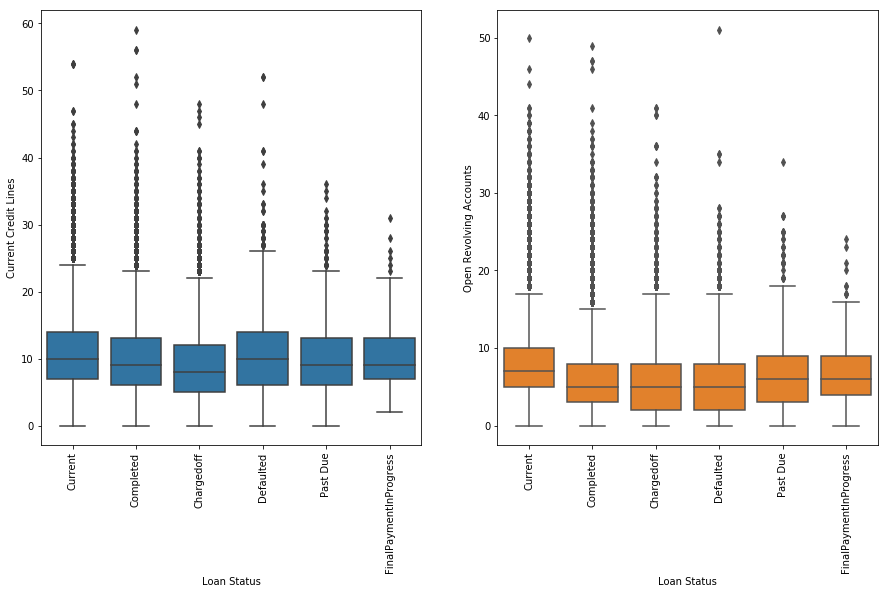

In [33]:
# Order the categorical variable LoanStatus
cat_order = loan_df['LoanStatus'].value_counts().index

# Define figure size
plt.figure(figsize = [15, 8])

# LoanStatus vs CurrentCreditLines on the left
default_color = sb.color_palette()[0]
plt.subplot(1, 2, 1)
ax1 = sb.boxplot(data=loan_df, x='LoanStatus', y='CurrentCreditLines', color = default_color, order=cat_order)
plt.xlabel('Loan Status')
plt.ylabel('Current Credit Lines')
plt.xticks(rotation=90);

# LoanStatus vs OpenRevolvingAccounts on the right
default_color = sb.color_palette()[1]
plt.subplot(1, 2, 2)
ax2 = sb.boxplot(data=loan_df, x='LoanStatus', y='OpenRevolvingAccounts', color = default_color, order=cat_order)
plt.xlabel('Loan Status')
plt.ylabel('Open Revolving Accounts')
plt.xticks(rotation=90);

Interestingly, it appears that there isn't a significant difference between loan status and how many current credit lines or open revolving accounts borrowers have on this dataset. However, defaulted loans have a slight higher median current credit lines than others status. 

Another two interesting features regarding the ability of borrowers to pay their loans are `DebtToIncomeRatio` and `ProsperScore`. 

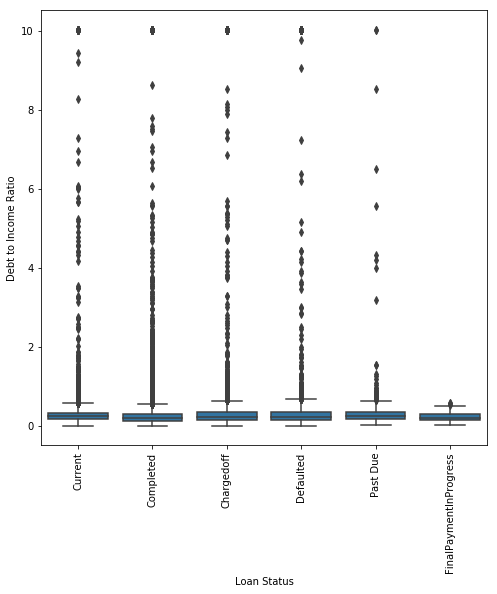

In [34]:
# Define figure size
plt.figure(figsize = [8, 8])

# LoanStatus vs DebtToIncomeRatio
default_color = sb.color_palette()[0]
ax1 = sb.boxplot(data=loan_df, x='LoanStatus', y='DebtToIncomeRatio', color = default_color, order=cat_order)
plt.xlabel('Loan Status')
plt.ylabel('Debt to Income Ratio')
plt.xticks(rotation=90);

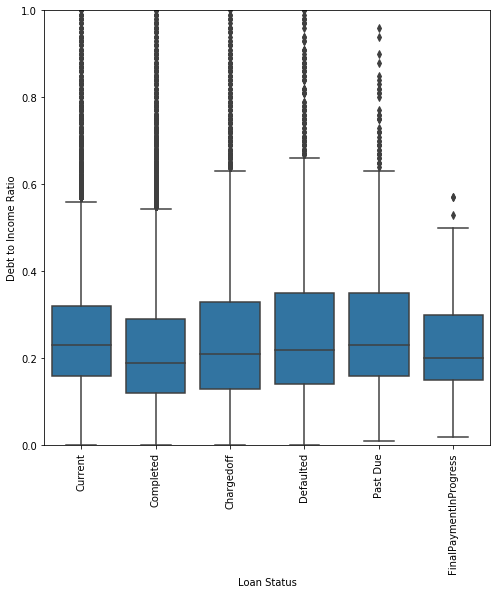

In [35]:
# LoanStatus vs DebtToIncomeRatio limiting y axes
plt.figure(figsize = [8, 8])
default_color = sb.color_palette()[0]

ax1 = sb.boxplot(data=loan_df, x='LoanStatus', y='DebtToIncomeRatio', color = default_color, order=cat_order)
plt.xlabel('Loan Status')
plt.ylabel('Debt to Income Ratio')
plt.ylim(0,1)
plt.xticks(rotation=90);

Depite the outliers, charged-off and defaulted loans have more borrowers with higher debt to income ratio that completed loans.  

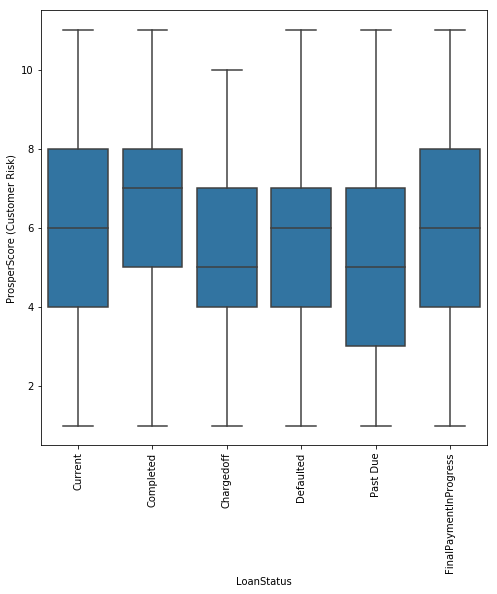

In [36]:
# LoanStatus vs ProsperScore
plt.figure(figsize = [8, 8])
default_color = sb.color_palette()[0]

ax2 = sb.boxplot(data=loan_df, x='LoanStatus', y='ProsperScore', color = default_color, order=cat_order)
plt.ylabel('ProsperScore (Customer Risk)')
plt.xticks(rotation=90);

Surprisingly, borrowers with higher prosper score completed their loans. Looking back at the relationship between prosper score and the remaining features chosen for this analysis, we can not explain this behaviour.

We can also observe that charged-off loans have borrowers with lower median risk. Hence, Prosper should review its risk assessment procedure to make sure that it doesn't have any issues.

Moving on to the last numerical feture, let's plot the relationship between `LoanOriginalAmount` and `LoanStatus`: 

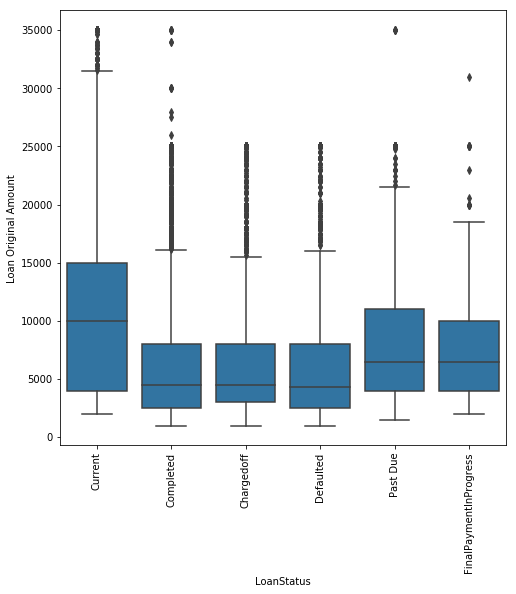

In [37]:
# LoanStatus vs LoanOriginalAmount
plt.figure(figsize = [8, 8])
default_color = sb.color_palette()[0]

ax2 = sb.boxplot(data=loan_df, x='LoanStatus', y='LoanOriginalAmount', color = default_color, order=cat_order)
plt.ylabel('Loan Original Amount')
plt.xticks(rotation=90);

Looking at completed, charged-off, and defaulted loans, we cannot observe differences between their median original loan amount. However, current loans amount are bigger than the other.

We should now analyze the relationship between `LoanStatus` and the selected categorical features. Let's start with the `ListingCategory`; in other words, the type of loan.

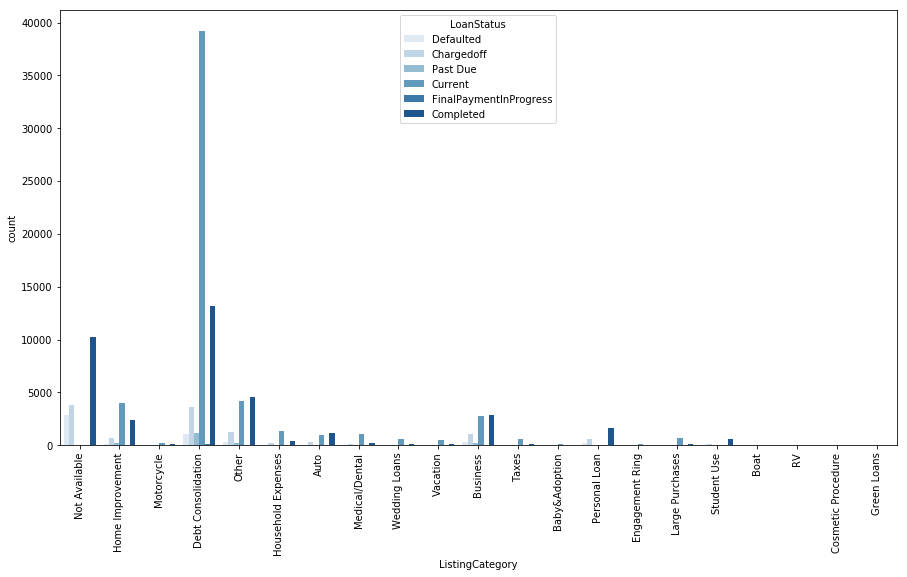

In [38]:
# LoanStatus vs ListingCategory

plt.figure(figsize = [15, 8])

sb.countplot(data = loan_df, x = 'ListingCategory', hue = 'LoanStatus', palette = 'Blues')
plt.xticks(rotation=90);

As we are more interested on completed, charged-off, and defaulted loans; this chart will consider only these `LoanStatus`.

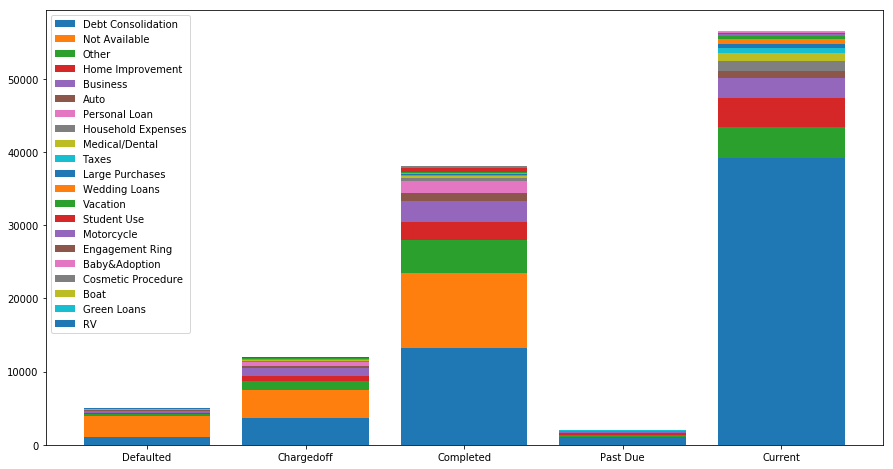

In [39]:
# LoanStatus vs ListingCategory: stacked bar chart, absolute counts
loan_cat_order = ['Defaulted', 'Chargedoff', 'Completed', 'Past Due', 'Current']
listing_cat_order = loan_df['ListingCategory'].value_counts().index

baselines = np.zeros(len(loan_cat_order))

plt.figure(figsize = [15, 8])

# for each second-variable category:
for i in range(len(listing_cat_order)):
# isolate the counts of the first category,
    listing_cat = listing_cat_order[i]
    inner_counts = loan_df[loan_df['ListingCategory'] == listing_cat]['LoanStatus'].value_counts()
# then plot those counts on top of the accumulated baseline
    plt.bar(x = np.arange(len(loan_cat_order)), height = inner_counts[loan_cat_order],
            bottom = baselines)
    baselines += inner_counts[loan_cat_order]

plt.xticks(np.arange(len(loan_cat_order)), loan_cat_order)
plt.legend(listing_cat_order);

The majority of current listing are *Debt Consolidation*. We can also observe a similar partner can be observed for Past Due and Completed loans. Defaulted and Charged-off loans have a high number of Not Available and Other listing types, which should be fixed by Prosper to allow a better analysis of the relationship between *`LoanStatus`* and *`ListingCategory`*.

Finally, let's take a look at the relationship between `LoanStatus` and two more categorical variables: `IsBorrowerHomeOwner` and `IncomeVerifiable`. 

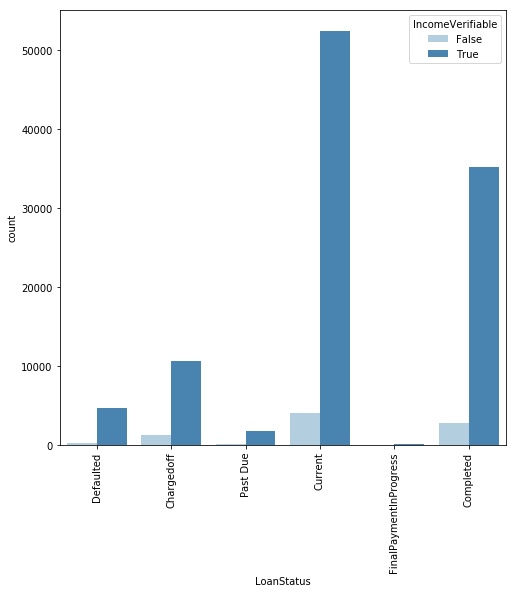

In [40]:
# LoanStatus vs IncomeVerifiable
plt.figure(figsize = [8, 8])

sb.countplot(data = loan_df, x = 'LoanStatus', hue = 'IncomeVerifiable', palette = 'Blues')
plt.xticks(rotation=90);

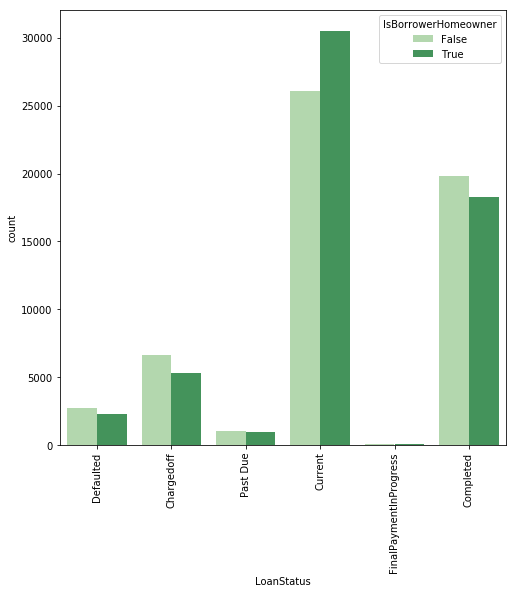

In [41]:
# LoanStatus vs IsBorrowerHomeOwner
plt.figure(figsize = [8, 8])

sb.countplot(data = loan_df, x = 'LoanStatus', hue = 'IsBorrowerHomeowner', palette = 'Greens')
plt.xticks(rotation=90);

The relationship between *`LoanStatus`* and *`IsBorrowerHomeowner`* doesn't tell much. Let's build the same chart but only considering home improvement loans.

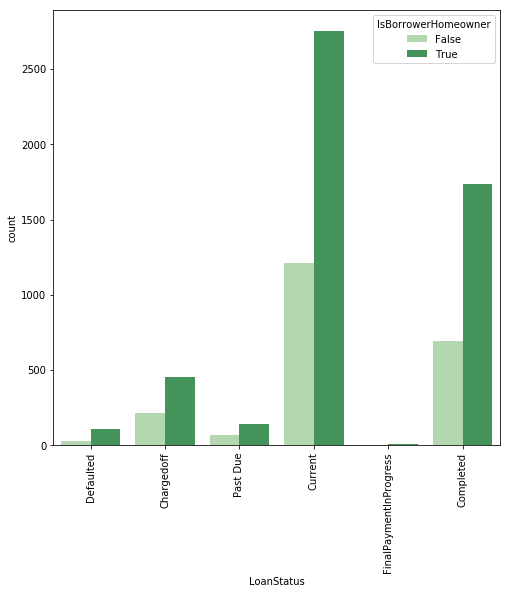

In [42]:
# LoanStatus vs IsBorrowerHomeOwner for Home Improvement loans
plt.figure(figsize = [8, 8])

sb.countplot(data = loan_df[loan_df['ListingCategory'] == 'Home Improvement'], x = 'LoanStatus', hue = 'IsBorrowerHomeowner', palette = 'Greens')
plt.xticks(rotation=90);

The chart about shows that most of charged-off and defaulted home improvement loans had homeowners as borrowers.

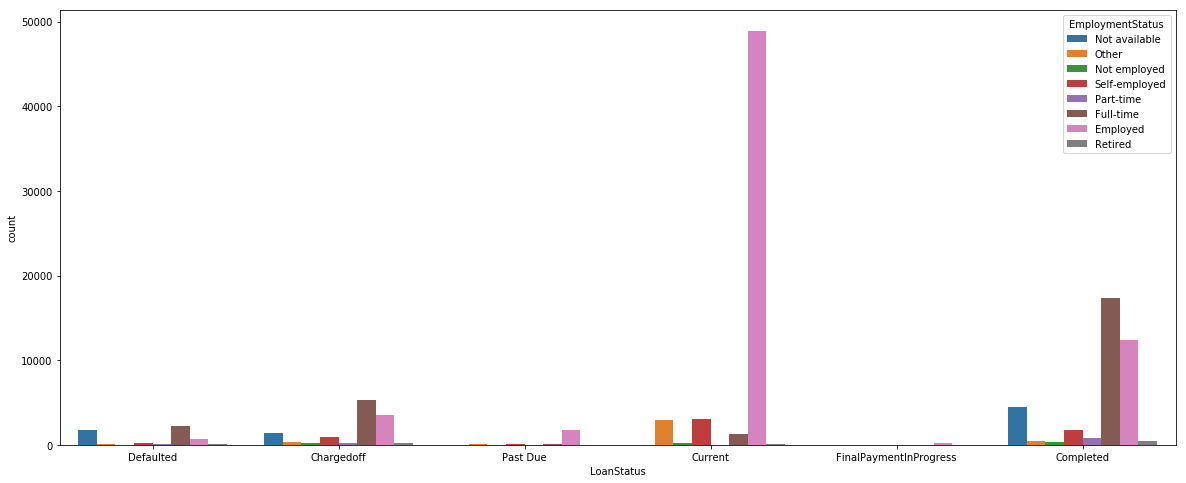

In [43]:
# LoanStatus vs EmploymentStatus
plt.figure(figsize = [20, 8])

sb.countplot(data = loan_df, x = 'LoanStatus', hue = 'EmploymentStatus');

Surprisily, borrowers how are employed and have full-time jobs have most of the defaulted and charged-off loans. 

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

Two other features presented an exciting relationship with the chosen variable of interest during the bivariate exploratory study: debt to income ratio and original loan amount.

As expected, loans completed or about to be finalized (*FinalPaymentInProgress status*) presented the lower debt to income ratio than the remaining loan status. 

Additionally, current loans have a higher original loan amount than the other statuses. Here, I would recommend further investigation alongside Prosper's business analysts to understand if people are getting higher loans or this phenomenon is due to external factors, such as macro-economic ones.

Finally, employed borrowers had the highest amount of charged-off loans that borrowers under the remaining employment status. In fact, I expected the opposite. 

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

When investigating the correlation between the numerical features chosen for this project, we can observe a positive relationship between proper score, the borrower risk attributed, and the original loan amount. It may indicate that bigger loans could increase Prosper's risk.

Besides this relationship, we also notice that a higher number of current credit lines led to a higher number of revolving accounts, which is an expected find.

## Multivariate Exploration

To finalize this exploratory analysis, it would be interesting to verify if the duration of borrowers employment status are related with the loan status. 

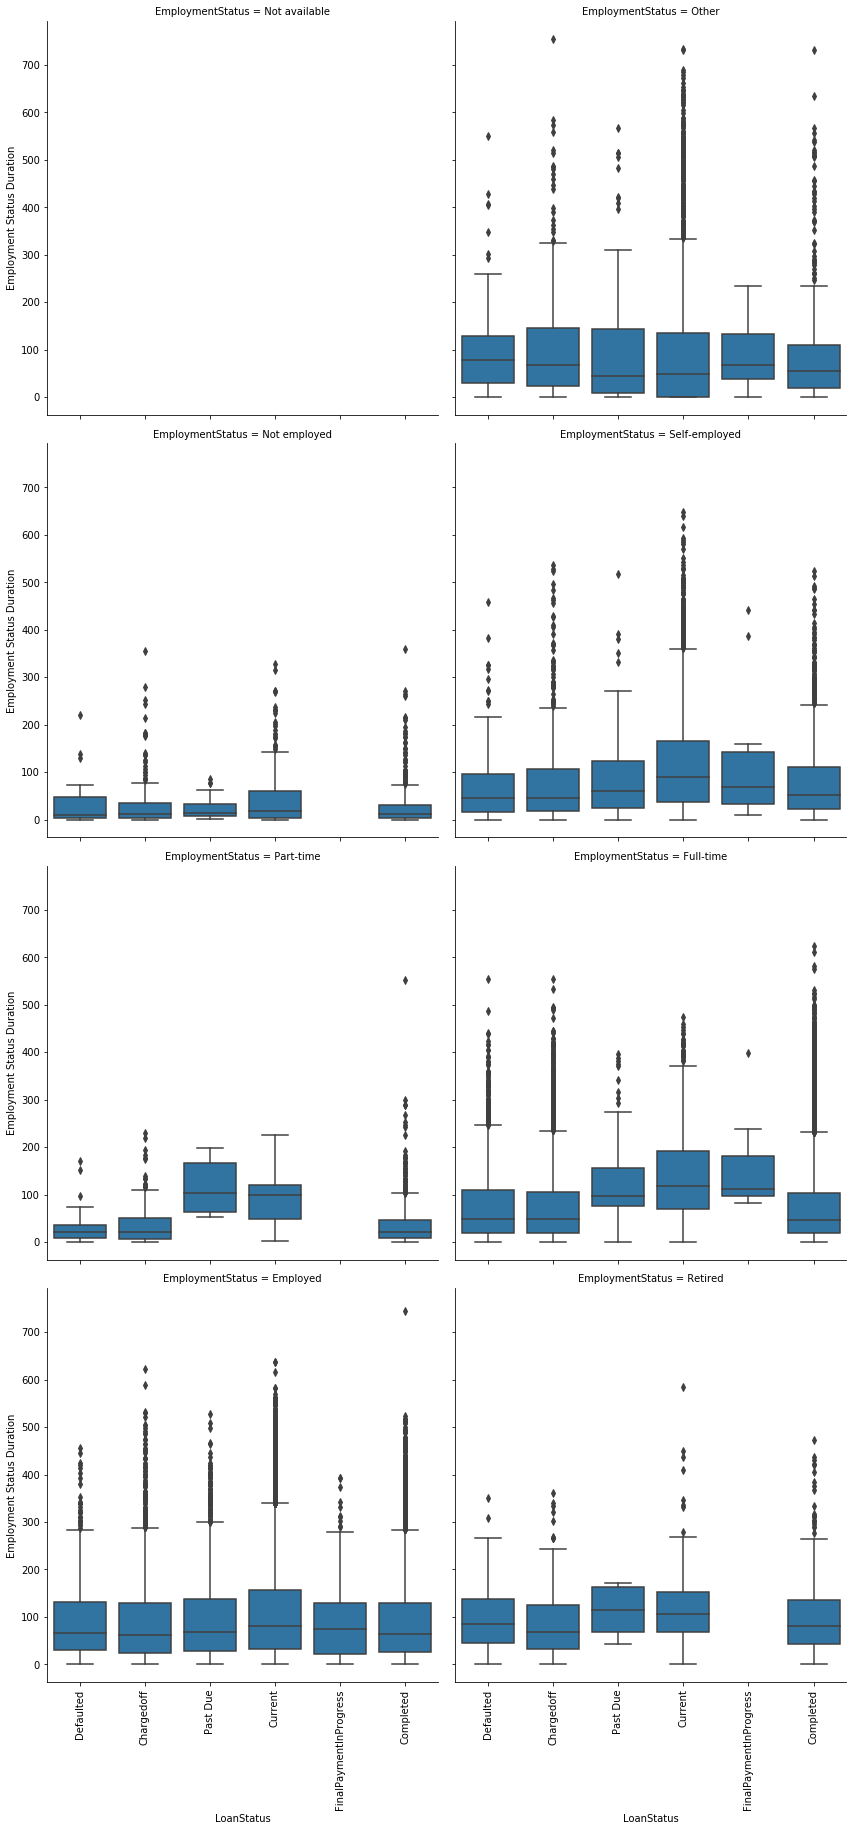

In [44]:
# LoanStatus vs EmploymentStatus vs EmploymentStatusDuration: create faceted heat maps on levels of the color variable
valid_employment = loan_df[loan_df['EmploymentStatus'] != 'Not available'][['LoanStatus', 'EmploymentStatus', 'EmploymentStatusDuration']]

g = sb.FacetGrid(data = valid_employment, col = 'EmploymentStatus', col_wrap = 2, size = 6, dropna=True, legend_out=True, )
g.map(sb.boxplot, 'LoanStatus', 'EmploymentStatusDuration')
g.set_xlabels()
g.set_ylabels('Employment Status Duration')
g.set_xticklabels(rotation=90)

plt.show()

Looking at the employment status duration, we noticed that non-employed borrowers have more current loans than loans in the remaining statuses, which is expected. Additionally, clients who have part-time jobs for longer also have more past due loans. 

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

In this multivariate analysis, I expected to find those non-employed borrowers for a long time would have more charged-off and defaulted loans than the working ones. Which I couldn't observe during this analysis.

### Were there any interesting or surprising interactions between features?

I expected a higher contribution of some statuses, such as non-employed borrowers and debt to income ratio, on charged-off and defaulted loans. The failure to confirm these may be an indicator that Prosper's risk analysts are doing a great job preventing business loss.

In [100]:
# Converting this report to html format
from subprocess import call
call(['python', '-m', 'nbconvert', 'prosperLoan_data_exploration.ipynb'])

0